In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data
path="/content/drive/MyDrive/data/titanic_data.csv"
df=pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.shape

(418, 12)

In [5]:
# Dropping unrelated columns
df=df.drop(['Name','Ticket','Cabin','Parch','Fare'],axis=1)

In [6]:
# Converting into numeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Embarked
0,892,0,3,1,34.5,0,Q
1,893,1,3,0,47.0,1,S
2,894,0,2,1,62.0,0,Q


In [7]:
# Converting into numeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Embarked
0,892,0,3,1,34.5,0,1
1,893,1,3,0,47.0,1,2
2,894,0,2,1,62.0,0,1


<Axes: >

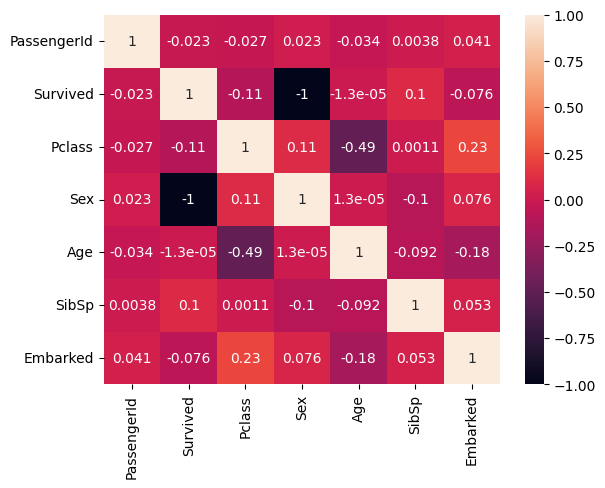

In [8]:
# Correlation between all columns
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Survived', ylabel='count'>

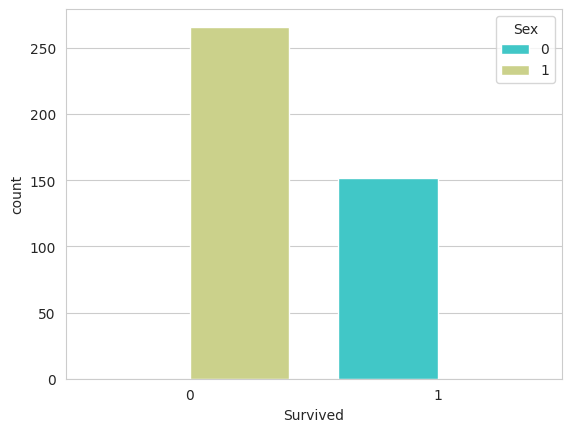

In [9]:
# Graphical visualization for survived with gender
# where 0 denotes male and 1 denotes female
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

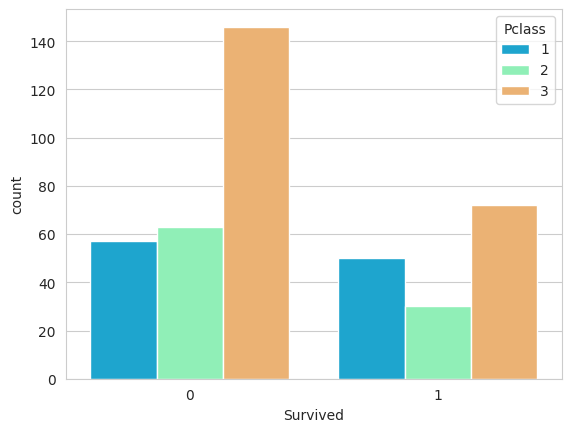

In [10]:
# Graph for survived with pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

In [11]:
# Checking for null values
df.columns[df.isna().any()]

Index(['Age'], dtype='object')

In [12]:
# Filling the missing values of age with mean of all
df.Age = df.Age.fillna(df.Age.mean())

In [13]:
# Checking data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Embarked         int64
dtype: object

In [14]:
# Converting float to int type
df['Age']=df['Age'].astype(int)
df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int64
SibSp          int64
Embarked       int64
dtype: object

In [15]:
# x inputs and y targets
x=df.drop(['Survived'],axis=1)
y=df.Survived

In [16]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Embarked
0,892,3,1,34,0,1
1,893,3,0,47,1,2
2,894,2,1,62,0,1
3,895,3,1,27,0,2
4,896,3,0,22,1,2


In [17]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [18]:
# Using random forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [19]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
model.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
# checking accuracy
model.score(x_test,y_test)

1.0

In [21]:
# Checking the model prediction
model.predict(x_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [22]:
# checking where the model predicted wrong

y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
result=confusion_matrix(y_test,y_pred)
result

array([[74,  0],
       [ 0, 52]])

In [23]:
# Accuracy
from sklearn.metrics import accuracy_score
result=accuracy_score(y_test,y_pred)
result

1.0

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [26]:
# checking where the model predicted wrong
from sklearn.metrics import confusion_matrix
result=confusion_matrix(y_test,y_pred)
result

array([[74,  0],
       [ 0, 52]])

In [27]:
# Accuracy
from sklearn.metrics import accuracy_score
re=accuracy_score(y_test,y_pred)
re

1.0